In [12]:
from numpy import *
import matplotlib.pyplot as plt
import operator
import time

LINE_OF_DATA = 6
LINE_OF_TEST = 4

In [17]:
trainDataSet=[[1, 1, 4], 
                [1, 2, 3], 
                [1, -2, 3], 
                [1, -2, 2], 
                [1, 0, 1], 
                [1, 1, 2]]
trainShares=[1, 1, 1, 0, 0,  0]
testDataSet=[[1, 1, 1], 
                [1, 2, 0], 
                [1, 2, 4], 
                [1, 1, 3]]

In [ ]:
def sigmoid(inX):
	return 1.0 / (1 + exp(-inX))

In [18]:
def gradAscent(dataMatIn, classLabels, alpha=0.001, maxCycles=1000):
	dataMatrix = mat(dataMatIn)
	labelMat = mat(classLabels).transpose()
	m, n = shape(dataMatrix)
	weights = ones((n, 1))
	for k in range(maxCycles):
		h = sigmoid(dataMatrix * weights)
		error = (labelMat - h)
		weights = weights + alpha * dataMatrix.transpose() * error
	return weights

def plotBestFit(weights):
	dataMat, labelMat = createTrainDataSet()
	dataArr = array(dataMat)
	n = shape(dataArr)[0]
	xcord1 = []; ycord1 = []
	xcord2 = []; ycord2 = []
	for i in range(n):
		if int(labelMat[i]) == 1:
			xcord1.append(dataArr[i, 1])
			ycord1.append(dataArr[i, 2])
		else:
			xcord2.append(dataArr[i, 1])
			ycord2.append(dataArr[i, 2])
	fig = plt.figure()
	ax = fig.add_subplot(111)
	ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
	ax.scatter(xcord2, ycord2, s=30, c='green')
	x = arange(-3.0, 3.0, 0.1)
	y = (-weights[0] - weights[1] * x) / weights[2]
	ax.plot(x, y)
	plt.xlabel('X1'); plt.ylabel('X2')
	plt.show()

def classifyVector(inX, weights):
	prob = sigmoid(sum(inX * weights))
	if prob > 0.5:
		return 1
	else:
		return 0

def classifyAll(dataSet, weights):
	predict = []
	for vector in dataSet:
		predict.append(classifyVector(vector, weights))
	return predict

def main():
	regMatrix = gradAscent(trainDataSet, trainShares, 0.01, 600)
	print("regMatrix = \n", regMatrix)
	plotBestFit(regMatrix.getA())
	predictShares = classifyAll(testDataSet, regMatrix)
	print("predictResult: \n", predictShares)

regMatrix = 
 [[-2.7205211 ]
 [ 0.19112108]
 [ 1.23590529]]


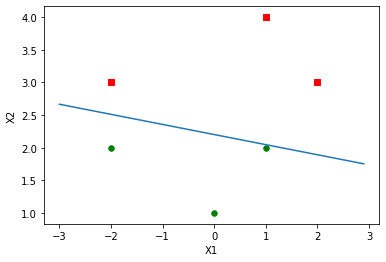

predictResult: 
 [0, 0, 1, 1]


In [19]:
main()